## Library Employment Stats
https://fivethirtyeight.com/features/where-are-americas-librarians/

In [1]:
# Boilerplate Environment. See notebook: 0_Getting_Started_with_Statistics_and_Python# Boile 

# Determining enviornment
def at_google_colab():
    try:
        cfg = get_ipython().config 
        if cfg['IPKernelApp']['kernel_class'] == 'google.colab._kernel.Kernel':
            return True
        else:
            return False
    except NameError:
        return False

# where are we?
location = None
if at_google_colab():
    location = 'at Google'
else:
    location = 'locally'

# print prediction
print('I think you are running {}!'.format(location))

# Import packages
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt    
if at_google_colab:
    %matplotlib inline
else:
    %matplotlib notebook

if at_google_colab():
    url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/librarians/librarians-by-msa.csv'
    df = pd.read_csv(url,index_col=0,parse_dates=[0])
else:
    # Example of loading locally
    df = pd.read_csv('data/libraries.csv')

I think you are running locally!


In [2]:
df.shape

(373, 6)

In [17]:
# total_emp - the estimated total employment for the category
# emp_prse - the percent relative standard error for the employment category
# jobs_1000 - the number of jobs in the employment category per 1,000 jobs in the metro area
# loc_quotient - I *think* this is geo-location related
df.head()

,prim_state,area_name,tot_emp,emp_prse,jobs_1000,loc_quotient
0,OH,"Springfield, OH",NaN,NaN,NaN,**
1,WA,"Mount Vernon-Anacortes, WA",NaN,NaN,NaN,**
2,PR,"Aguadilla-Isabela-San Sebastian, PR",160.0,4.4,3.727,3.62
3,PR,"Ponce, PR",180.0,3.6,3.434,3.34
4,PR,"San German-Cabo Rojo, PR",50.0,0.2,2.679,2.6


In [4]:
df.describe()

,prim_state,area_name,tot_emp,emp_prse,jobs_1000,loc_quotient
count,373,373,373,373,373,373
unique,52,373,93,195,324,135
top,TX,"Morgantown, WV",40,6.6,0.663,1
freq,25,1,30,7,3,10


In [5]:
df.dtypes

prim_state      object
area_name       object
tot_emp         object
emp_prse        object
jobs_1000       object
loc_quotient    object
dtype: object

In [6]:
df[df['tot_emp']!='**'].head()

,prim_state,area_name,tot_emp,emp_prse,jobs_1000,loc_quotient
2,PR,"Aguadilla-Isabela-San Sebastian, PR",160,4.4,3.727,3.62
3,PR,"Ponce, PR",180,3.6,3.434,3.34
4,PR,"San German-Cabo Rojo, PR",50,0.2,2.679,2.6
5,PR,"Mayaguez, PR",80,1.4,2.563,2.49
6,KY,"Owensboro, KY",100,34,2.099,2.04


In [7]:
df[['tot_emp','emp_prse','jobs_1000']] = df[['tot_emp','emp_prse','jobs_1000']].apply(pd.to_numeric, errors='coerce')

In [8]:
df.dtypes

prim_state       object
area_name        object
tot_emp         float64
emp_prse        float64
jobs_1000       float64
loc_quotient     object
dtype: object

In [9]:
df.head()

,prim_state,area_name,tot_emp,emp_prse,jobs_1000,loc_quotient
0,OH,"Springfield, OH",NaN,NaN,NaN,**
1,WA,"Mount Vernon-Anacortes, WA",NaN,NaN,NaN,**
2,PR,"Aguadilla-Isabela-San Sebastian, PR",160.0,4.4,3.727,3.62
3,PR,"Ponce, PR",180.0,3.6,3.434,3.34
4,PR,"San German-Cabo Rojo, PR",50.0,0.2,2.679,2.6


In [10]:
df.describe()

,tot_emp,emp_prse,jobs_1000
count,371.000000,371.000000,371.000000
mean,305.714286,11.393531,1.080935
std,541.960120,8.616456,0.402760
min,30.000000,0.000000,0.163000
25%,70.000000,5.300000,0.819000
50%,110.000000,9.100000,1.024000
75%,285.000000,15.200000,1.270000
max,5440.000000,45.500000,3.727000


Total Employment
Varience: 293720.7722007721
StD: 541.9601204892958


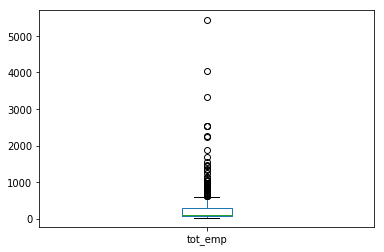

In [28]:
print('Total Employment')
print('Varience: {}'.format(df.loc[:,'tot_emp'].var()))
print('StD: {}'.format(df.loc[:,'tot_emp'].std()))
df['tot_emp'].plot.box()

In [65]:
te_outliers = df[df['tot_emp'] > df['tot_emp'].mean() + 2 * df['tot_emp'].std()]
print(te_outliers.groupby(['prim_state'])['tot_emp'].sum())

prim_state
CA    2530.0
DC    3340.0
GA    2250.0
IL    4050.0
MA    2540.0
MD    1560.0
MN    1450.0
NY    7970.0
PA    3330.0
TX    3910.0
WA    1460.0
Name: tot_emp, dtype: float64


Libriarians per 1000
Varience: 0.1622153201282145
StD: 0.40275963070821097


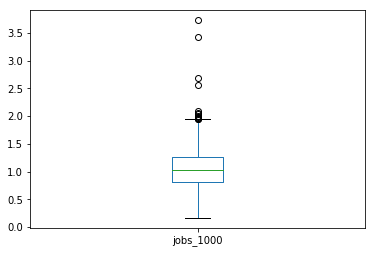

In [29]:
print('Libriarians per 1000')
print('Varience: {}'.format(df.loc[:,'jobs_1000'].var()))
print('StD: {}'.format(df.loc[:,'jobs_1000'].std()))
df['jobs_1000'].plot.box()

In [66]:
# looking at the outliers job's per 1000
j1_outliers = df[df['jobs_1000'] > df['jobs_1000'].mean() + 2 * df['jobs_1000'].std()]
print(j1_outliers[['prim_state','area_name','jobs_1000']].sort_values('prim_state'))
j1_outliers.groupby(['prim_state'])['jobs_1000'].mean()

   prim_state                                          area_name  jobs_1000
9          CT                                      New Haven, CT      2.010
14         DE                                          Dover, DE      1.952
11         FL                                    Tallahassee, FL      1.975
6          KY                                      Owensboro, KY      2.099
10         MA  Haverhill-North Andover-Amesbury, MA-NH NECTA ...      1.985
8          MD  Bethesda-Rockville-Frederick, MD Metropolitan ...      2.036
15         MO                                  St. Joseph, MO-KS      1.942
12         NC                             Durham-Chapel Hill, NC      1.962
7          NY           Nassau-Suffolk, NY Metropolitan Division      2.050
13         NY                                         Ithaca, NY      1.954
2          PR                Aguadilla-Isabela-San Sebastian, PR      3.727
3          PR                                          Ponce, PR      3.434
4          P

prim_state
CT    2.01000
DE    1.95200
FL    1.97500
KY    2.09900
MA    1.98500
MD    2.03600
MO    1.94200
NC    1.96200
NY    2.00200
PR    3.10075
Name: jobs_1000, dtype: float64

In [74]:
# states with outliers per 1000 and overall employment
print(set(j1_outliers['prim_state']).intersection(set(te_outliers['prim_state'])))

{'MA', 'NY', 'MD'}
